In [1]:
import pandas as pd
import numpy as np 
pd.set_option('display.max_columns', None)

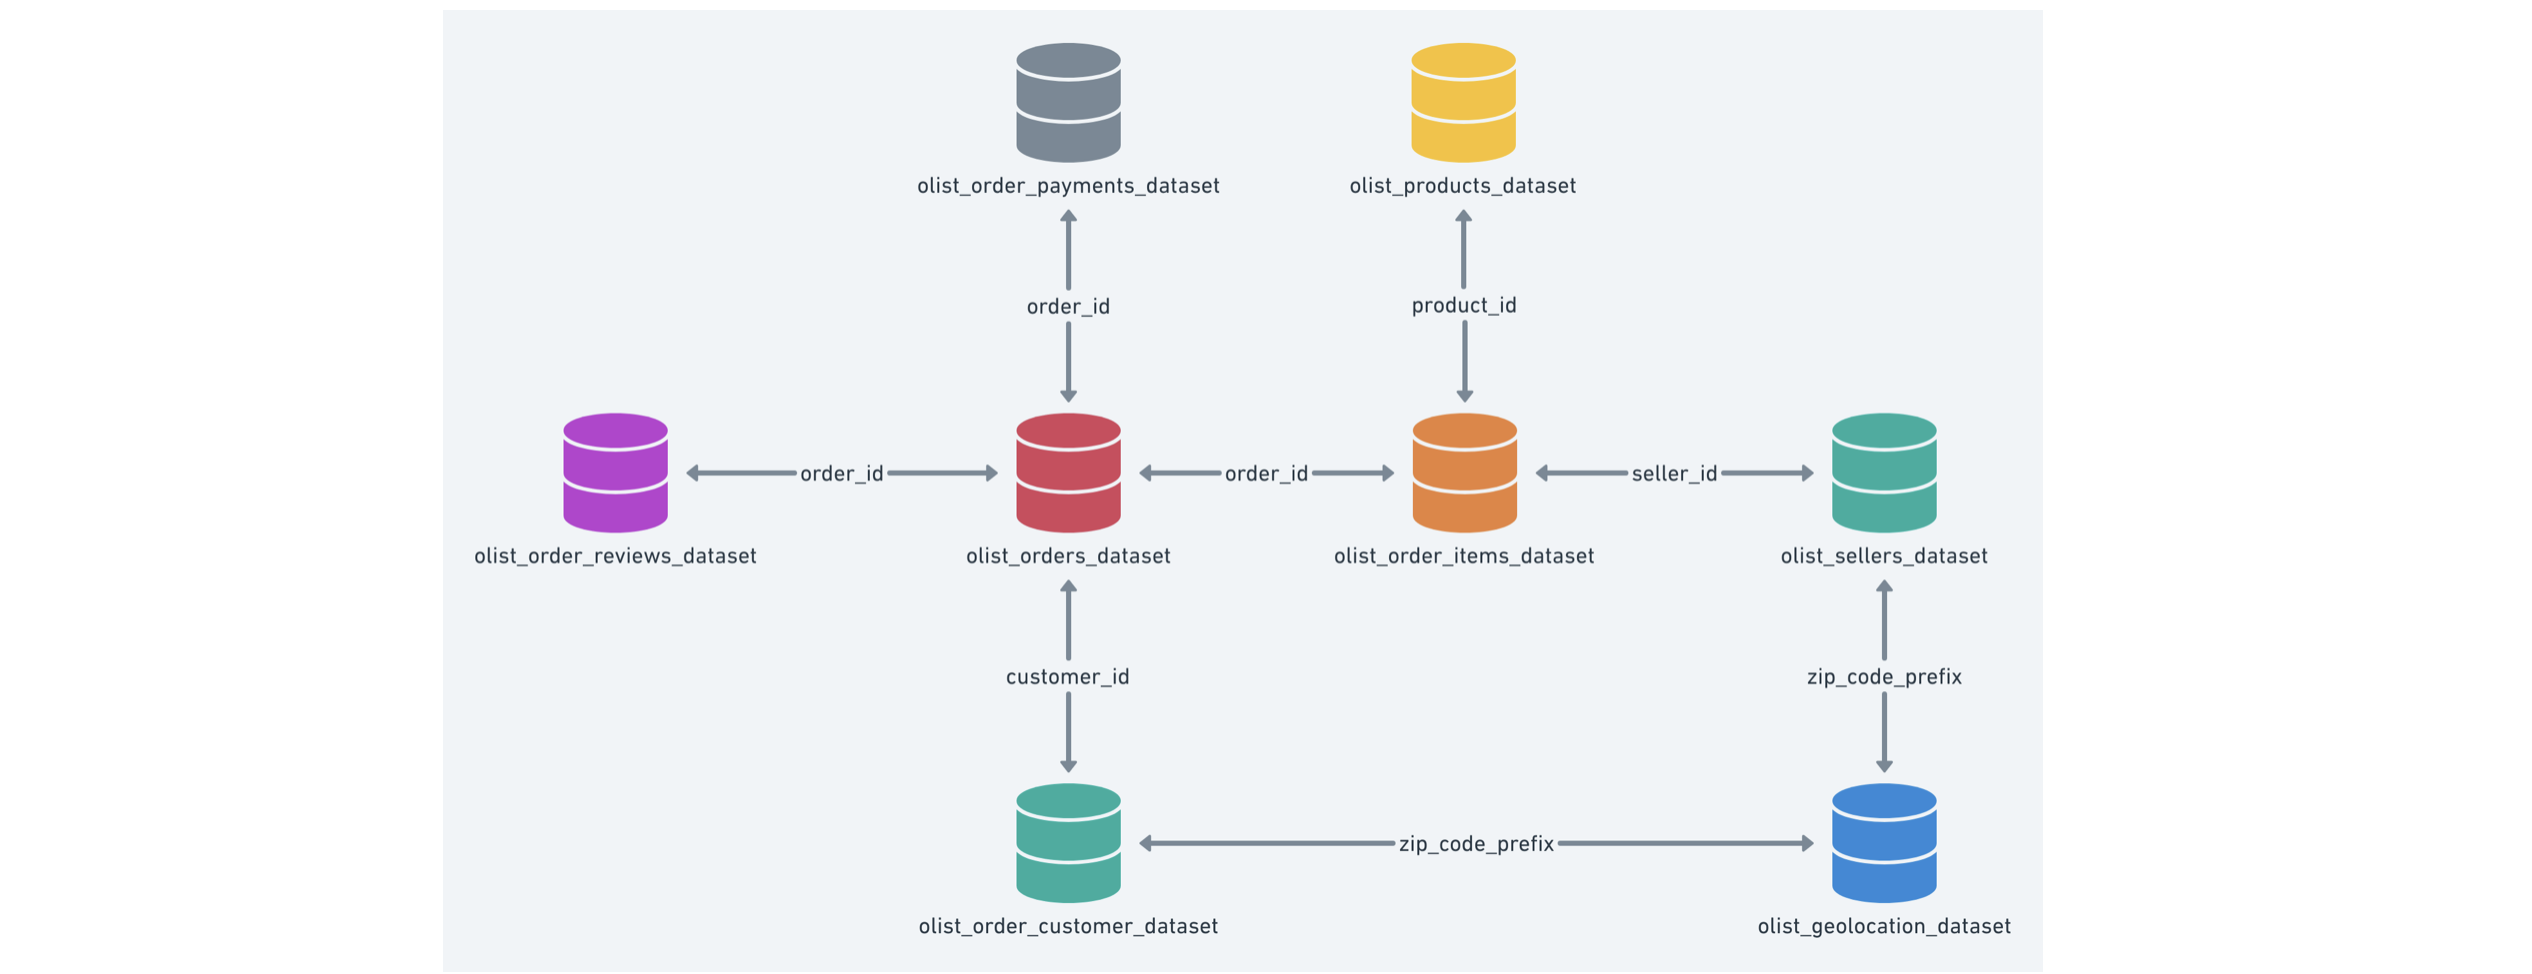

## Getting Datasets

In [2]:
products = pd.read_csv('olist_products_dataset.csv')
cat_name_ing = pd.read_csv('product_category_name_translation.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geoloc = pd.read_csv('olist_geolocation_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

In [3]:
print(products.columns.tolist(), '\n\n')
print(products.shape, '\n\n')
print(cat_name_ing.columns.tolist(), '\n\n')
print(cat_name_ing.shape)

['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'] 


(32951, 9) 


['product_category_name', 'product_category_name_english'] 


(71, 2)


In [4]:
products = products.merge(cat_name_ing, how='left', on='product_category_name')

In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [6]:
products.drop('product_category_name', axis=1, inplace=True)

In [7]:
print(products.columns.tolist(), '\n\n')
print(products.shape, '\n\n')
print(order_items.columns.tolist(), '\n\n')
print(order_items.shape)

['product_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english'] 


(32951, 9) 


['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'] 


(112650, 7)


In [8]:
order_products = order_items.merge(products, how='left', on='product_id')

In [9]:
order_products.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop


In [10]:
print(order_products.columns.tolist(), '\n\n')
print(order_products.shape, '\n\n')
print(orders.columns.tolist(), '\n\n')
print(orders.shape)

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english'] 


(112650, 15) 


['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'] 


(99441, 8)


In [11]:
order_products = order_products.merge(orders, how='left', on='order_id')

In [12]:
order_products.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00


In [13]:
print(order_products.columns.tolist(), '\n\n')
print(order_products.shape, '\n\n')
print(order_reviews.columns.tolist(), '\n\n')
print(order_reviews.shape)

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'] 


(112650, 22) 


['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'] 


(99224, 7)


In [14]:
order_products = order_products.merge(order_reviews, how='left', on='order_id')

In [15]:
order_products.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13


In [16]:
print(order_products.columns.tolist(), '\n\n')
print(order_products.shape, '\n\n')
print(order_payments.columns.tolist(), '\n\n')
print(order_payments.shape)

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'] 


(113314, 28) 


['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'] 


(103886, 5)


In [17]:
order_products = order_products.merge(order_payments, how='left', on='order_id')

In [18]:
order_products.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83


In [19]:
print(geoloc.columns.tolist(), '\n\n')
print(geoloc.shape, '\n\n')
print(customers.columns.tolist(), '\n\n')
print(customers.shape)

['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state'] 


(1000163, 5) 


['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'] 


(99441, 5)


In [20]:
geoloc.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
customers.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [21]:
geoloc.drop_duplicates(subset=['zip_code_prefix'], inplace=True)

In [22]:
customers = customers.merge(geoloc, how='left', on='zip_code_prefix')

In [23]:
customers.rename(columns={'zip_code_prefix' : 'customer_zip_code_prefix'}, inplace=True)

In [24]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,campinas,SP


In [25]:
customers.rename(columns={'geolocation_lat': 'customer_geolocation_lat',
                          'geolocation_lng':'customer_geolocation_lng'}, inplace=True)

In [26]:
customers.drop(['geolocation_city', 'geolocation_state'], axis=1, inplace=True)

In [27]:
print(geoloc.columns.tolist(), '\n\n')
print(geoloc.shape, '\n\n')
print(sellers.columns.tolist(), '\n\n')
print(sellers.shape)

['zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state'] 


(19015, 5) 


['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'] 


(3095, 4)


In [28]:
sellers.rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [29]:
sellers = sellers.merge(geoloc, how='left', on='zip_code_prefix')

In [30]:
sellers.rename(columns={'zip_code_prefix' : 'seller_zip_code_prefix',
                        'geolocation_lat' : 'seller_geolocation_lat',
                        'geolocation_lng' : 'seller_geolocation_lng'}, inplace=True)

In [31]:
sellers.drop(['geolocation_city', 'geolocation_state'], axis=1, inplace=True)

In [32]:
print(order_products.columns.tolist(), '\n\n')
print(order_products.shape, '\n\n')
print(sellers.columns.tolist(), '\n\n')
print(sellers.shape)

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'] 


(118310, 32) 


['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'seller_geolocation_lat', 'seller_geolocation_lng'] 


(3095, 6)


In [33]:
order_products = order_products.merge(sellers, how='left', on='seller_id')

In [34]:
order_products.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19,27277,volta redonda,SP,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83,3471,sao paulo,SP,-23.566258,-46.518417


In [35]:
print(order_products.columns.tolist(), '\n\n')
print(order_products.shape, '\n\n')
print(customers.columns.tolist(), '\n\n')
print(customers.shape)

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'seller_geolocation_lat', 'seller_geolocation_lng'] 


(118310, 37) 


['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'customer_geolocation_lat', 'customer_geolocation_lng'] 


(99441, 7)


In [36]:
df = order_products.merge(customers, how='left', on='customer_id')

In [37]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19,27277,volta redonda,SP,-22.498183,-44.123614,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.758076,-41.312633
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83,3471,sao paulo,SP,-23.566258,-46.518417,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.212393,-50.941471
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87,37564,borda da mata,MG,-22.264094,-46.158564,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.860439,-44.597972
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78,14403,franca,SP,-20.548228,-47.395897,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.144923,-46.539830
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04,87900,loanda,PR,-22.931427,-53.133759,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.249008,-46.824961


In [38]:
df = df.drop(['review_comment_title', 'review_comment_message', 'customer_id'], axis=1)

In [39]:
df.shape

(118310, 40)

In [40]:
df.to_csv('df_final_.csv', index=False)